In [1]:
# exploring RSA for the Similarity datasets

In [2]:
import os
import sys

import matplotlib.pyplot as plt

parent_dir = "/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024"
sys.path.append(parent_dir)
parent_dir="/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8"
sys.path.append(parent_dir)

In [3]:
print(sys.path)
base_dir = '/local_storage/datasets/farzaneh/alignment_olfaction_datasets/'

['/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python38.zip', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/lib-dynload', '', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages', '/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/alvadesccliwrapper-1.0.8-py3.8.egg', '/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024', '/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8']


In [4]:
device_name='cuda'
from argparse import Namespace
import yaml


# Determine the path to the 'hparams.yaml' file relative to the script's location
script_dir = os.getcwd()
yaml_path = os.path.join(script_dir, 'custom_utils/hparams.yaml')

with open('../custom_utils/hparams.yaml', 'r') as f:
    config = Namespace(**yaml.safe_load(f))
    
from custom_utils.tokenizer.tokenizer import MolTranBertTokenizer
from custom_utils.train_pubchem_light import LightningModule

from utils.util_alignment import *
from utils.prepare_datasets import *
from utils.custom_models import *
from utils.visualization_helper import *
from constants import gs_lf_tasks


Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/Midgard/home/farzantn/mambaforge/envs/Mol/lib/python3.8/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


Mol


In [5]:
seed = 2024
set_seeds(seed)

In [6]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 25
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font',**{'family':'serif','serif':['Times']})

# Loading Models

## Loading MolFormer Model

In [7]:
tokenizer = MolTranBertTokenizer('../custom_utils/tokenizer/bert_vocab.txt')
ckpt = '../MoLformer_Pretrained/checkpoints/N-Step-Checkpoint_3_30000.ckpt'
lm = LightningModule(config, tokenizer.vocab).load_from_checkpoint(ckpt, config=config, vocab=tokenizer.vocab)

/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/Notebooks


Global seed set to 12345


Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


# Loading Human Embeddings

## Ravia 2020 Similarity

In [8]:
df_ravia,df_ravia_similarity_mean, df_ravia_similarity_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_ravia2020_behavior_similairity.csv',base_path=base_dir)

## Snitz 2013

In [9]:
df_snitz, df_snitz_mean,df_snitz_mean_pivoted=prepare_ravia_or_snitz(dataset='curated_datasets/tasks/curated_snitz2013.csv',base_path=base_dir)

# Extracting embedding from MoLFormer Frozen

In [10]:
indices_train,indices_valid,indices_test = extract_set_idxs(base_dir, indices_path='curated_datasets/embeddings/pom/gslf-splits-idx.csv')

##  GS-LF 

In [11]:
input_file_molformer = 'curated_datasets/embeddings/molformer/gslf_molformer_embeddings_13_Apr17.csv'

gs_lf, gs_lf_np,gs_lf_y,gs_lf_embeddings_train,gs_lf_y_train,gs_lf_embeddings_valid,gs_lf_y_valid,gs_lf_embeddings_test,gs_lf_y_test = extract_set_from_indices(base_dir,input_file_molformer ,"embeddings","y", indices_train, indices_valid, indices_test)

In [12]:
embedding_train_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_train,gs_lf_y_train)
embedding_test_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_test,gs_lf_y_test)
embedding_valid_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_valid,gs_lf_y_valid)

dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_np,gs_lf_y)

In [13]:
# input_file_molformer_finetuned = 'curated_datasets/embeddings/molformerfinetuned/gslf_molformer_embeddings_13_Apr17.csv'
# 
# gs_lf_finetuned, gs_lf_np_finetuned,gs_lf_y_finetuned,gs_lf_embeddings_train_finetuned,gs_lf_y_train_finetuned,gs_lf_embeddings_valid_finetuned,gs_lf_y_valid_finetuned,gs_lf_embeddings_test_finetuned,gs_lf_y_test_finetuned = extract_set_from_indices(base_dir,input_file_molformer_finetuned ,"embeddings","y", indices_train, indices_valid, indices_test)

In [14]:
# embedding_finetuned_train_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_train_finetuned,gs_lf_y_train_finetuned)
# embedding_finetuned_test_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_test_finetuned,gs_lf_y_test_finetuned)
# embedding_finetuned_valid_dataset_gslf = dc.data.DiskDataset.from_numpy(gs_lf_embeddings_valid_finetuned,gs_lf_y_valid_finetuned)
# 
# dataset_finetuned_gslf = dc.data.DiskDataset.from_numpy(gs_lf_np_finetuned,gs_lf_y_finetuned)

## Ravia2020

In [15]:
modeldeepchem_gslf = None

In [16]:
input_file_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/ravia_molformer_embeddings_13_Apr17.csv'
df_ravia_similarity_mols_reps_sum,df_ravia_similarity_mols_embeddings_original_reps_sum\
,df_ravia_similarity_mols_embeddings_reps_sum,df_ravia_similarity_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_ravia_similarity_mean,mixing_type='sum')

In [17]:
df_ravia_similarity_mols_reps_average,df_ravia_similarity_mols_embeddings_original_reps_average\
,df_ravia_similarity_mols_embeddings_reps_average,df_ravia_similarity_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_ravia_similarity_mean,mixing_type='average')

In [18]:
df_ravia_similarity_mols_smiles,df_ravia_similarity_mols_embeddings_original_smiles\
,df_ravia_similarity_mols_embeddings_smiles,df_ravia_similarity_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

## Snitz 2013 

In [19]:
input_file_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformer/snitz_molformer_embeddings_13_Apr17.csv'
df_snitz_mols_reps_sum,df_snitz_mols_embeddings_original_reps_sum\
,df_snitz_mols_embeddings_reps_sum,df_snitz_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_snitz_mean,sep=',',mixing_type='sum')

In [20]:
df_snitz_mols_reps_average,df_snitz_mols_embeddings_original_reps_average\
,df_snitz_mols_embeddings_reps_average,df_snitz_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformr, df_snitz_mean,sep=',',mixing_type='average')

In [21]:
df_snitz_mols_smiles,df_snitz_mols_embeddings_original_smiles\
,df_snitz_mols_embeddings_smiles,df_snitz_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

# Extracting embedding from MoLFormer FineTuned

## Ravia

In [22]:
input_file_molformer_finetuned='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformerfinetuned/ravia_molformerfinetuned_embeddings_13_model_1Apr17.csv'
df_ravia_finetuned_similarity_mols_reps_sum,df_ravia_finetuned_similarity_mols_embeddings_original_reps_sum\
,df_ravia_finetuned_similarity_mols_embeddings_reps_sum,df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer_finetuned, df_ravia_similarity_mean,mixing_type='sum')

In [23]:
df_ravia_finetuned_similarity_mols_reps_average,df_ravia_finetuned_similarity_mols_embeddings_original_reps_average\
,df_ravia_finetuned_similarity_mols_embeddings_reps_average,df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_molformer_finetuned, df_ravia_similarity_mean,mixing_type='average')

In [24]:
df_ravia_finetuned_similarity_mols_smiles,df_ravia_finetuned_similarity_mols_embeddings_original_smiles\
,df_ravia_finetuned_similarity_mols_embeddings_smiles,df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_ravia_similarity_mean, lm, tokenizer)

## Snitz

In [25]:
input_file_finetuned_molformr='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/molformerfinetuned/snitz_molformerfinetuned_embeddings_13_model_1Apr17.csv'
df_snitz_finetuned_mols_reps_sum,df_snitz_finetuned_mols_embeddings_original_reps_sum\
,df_snitz_finetuned_mols_embeddings_reps_sum,df_snitz_finetuned_mols_embeddings_zscored_reps_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_finetuned_molformr, df_snitz_mean,sep=',',mixing_type='sum')

In [26]:
df_snitz_finetuned_mols_reps_average,df_snitz_finetuned_mols_embeddings_original_reps_average\
,df_snitz_finetuned_mols_embeddings_reps_average,df_snitz_finetuned_mols_embeddings_zscored_reps_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_finetuned_molformr, df_snitz_mean,sep=',',mixing_type='average')

In [27]:
df_snitz_finetuned_mols_smiles,df_snitz_finetuned_mols_embeddings_original_smiles\
,df_snitz_finetuned_mols_embeddings_smiles,df_snitz_finetuned_mols_embeddings_zscored_smiles\
=prepare_ravia_similarity_mols_mix_on_smiles(df_snitz_mean, lm, tokenizer)

# Extracting embedding from OpenPom


## Ravia2020 

In [28]:
input_file_pom='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/ravia_pom_embeddings_Apr17.csv'

df_ravia_similarity_mols_pom_sum,df_ravia_similarity_mols_embeddings_original_pom_sum\
,df_ravia_similarity_mols_embeddings_pom_sum,df_ravia_similarity_mols_embeddings_zscored_pom_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom, df_ravia_similarity_mean, modeldeepchem_gslf,mixing_type='sum')

In [29]:
df_ravia_similarity_mols_pom_average,df_ravia_similarity_mols_embeddings_original_pom_average\
,df_ravia_similarity_mols_embeddings_pom_average,df_ravia_similarity_mols_embeddings_zscored_pom_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom, df_ravia_similarity_mean, modeldeepchem_gslf,mixing_type='average')

## Snitz 2013

In [30]:
input_file_pom_snitz='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/snitz_pom_embeddings_Apr17.csv'
df_snitz_mols_pom_sum,df_snitz_mols_embeddings_original_pom_sum\
,df_snitz_mols_embeddings_pom_sum,df_snitz_mols_embeddings_zscored_pom_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom_snitz, df_snitz_mean, modeldeepchem_gslf,sep=',',mixing_type='sum')

In [31]:
df_snitz_mols_pom_average,df_snitz_mols_embeddings_original_pom_average\
,df_snitz_mols_embeddings_pom_average,df_snitz_mols_embeddings_zscored_pom_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_pom_snitz, df_snitz_mean, modeldeepchem_gslf,sep=',',mixing_type='average')

# Extract Embeddings from DAM

## Snitz

In [32]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/snitz_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_snitz_mols_DAM_sum,df_snitz_mols_embeddings_original_DAM_sum\
,df_snitz_mols_embeddings_DAM_sum, df_snitz_mols_embeddings_zscored_DAM_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_snitz_mean, modeldeepchem_gslf,sep=',',end='20',mixing_type='sum')

In [33]:
df_snitz_mols_DAM_average,df_snitz_mols_embeddings_original_DAM_average\
,df_snitz_mols_embeddings_DAM_average, df_snitz_mols_embeddings_zscored_DAM_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_snitz_mean, modeldeepchem_gslf,sep=',',end='20',mixing_type='average')

## Ravia

In [34]:
input_file_dam='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/alva/ravia_molecules_alva_y_Apr17.csv'
pd.read_csv(input_file_dam).head(5)

df_ravia_mols_DAM_sum,df_ravia_mols_embeddings_original_DAM_sum\
,df_ravia_mols_embeddings_DAM_sum,df_ravia_mols_embeddings_zscored_DAM_sum\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_ravia_similarity_mean, modeldeepchem_gslf,sep=';',end='20',mixing_type='sum')

In [35]:
df_ravia_mols_DAM_average,df_ravia_mols_embeddings_original_DAM_average\
,df_ravia_mols_embeddings_DAM_average,df_ravia_mols_embeddings_zscored_DAM_average\
=prepare_ravia_similarity_mols_mix_on_representations(input_file_dam, df_ravia_similarity_mean, modeldeepchem_gslf,sep=';',end='20',mixing_type='average')

# Cosine Similarity

## DAM

### Snitz

In [36]:
cosine_sim_df_snitz_mols_embeddings_DAM_average,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_average\
=cosine_sim_helper(df_snitz_mols_embeddings_DAM_average, df_snitz_mols_embeddings_zscored_DAM_average)


cosine_sim_df_snitz_mols_embeddings_DAM_sum,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_DAM_sum, df_snitz_mols_embeddings_zscored_DAM_sum)

# cosine_sim_df_snitz_similarity_mols_layers,cosine_sim_df_snitz_similarity_mols_layers_zscored\
# =cosine_sim_helper_layers(df_snitz_similarity_mols_embeddings_smiles, df_snitz_similarity_mols_embeddings_zscored_smiles, df_snitz_similarity_mols_layers_smiles, df_snitz_similarity_mols_layers_zscored_smiles)

### Ravia

In [37]:
cosine_sim_df_ravia_mols_embeddings_DAM_average,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_average\
=cosine_sim_helper(df_ravia_mols_embeddings_DAM_average, df_ravia_mols_embeddings_zscored_DAM_average)

cosine_sim_df_ravia_mols_embeddings_DAM_sum,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum\
=cosine_sim_helper(df_ravia_mols_embeddings_DAM_sum, df_ravia_mols_embeddings_zscored_DAM_sum)

# cosine_sim_df_ravia_similarity_mols_layers,cosine_sim_df_ravia_similarity_mols_layers_zscored\
# =cosine_sim_helper_layers(df_ravia_similarity_mols_embeddings_smiles, df_ravia_similarity_mols_embeddings_zscored_smiles, df_ravia_similarity_mols_layers_smiles, df_ravia_similarity_mols_layers_zscored_smiles)

## POM

### Snitz

In [38]:
cosine_sim_df_snitz_mols_embeddings_pom_average,cosine_sim_df_snitz_mols_embeddings_zscored_pom_average\
=cosine_sim_helper(df_snitz_mols_embeddings_pom_average, df_snitz_mols_embeddings_zscored_pom_average)

cosine_sim_df_snitz_mols_embeddings_pom_sum,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_pom_sum, df_snitz_mols_embeddings_zscored_pom_sum)

# cosine_sim_df_snitz_mols_layers,cosine_sim_df_snitz_mols_layers_zscored \
# =cosine_sim_helper_layers(df_snitz_mols_embeddings, df_snitz_mols_embeddings_zscored, df_snitz_mols_layers, df_snitz_mols_layers_zscored)

### Ravia

In [39]:
cosine_sim_df_ravia_similarity_mols_embeddings_pom_average,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_average\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_pom_average, df_ravia_similarity_mols_embeddings_zscored_pom_average)

cosine_sim_df_ravia_similarity_mols_embeddings_pom_sum,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_pom_sum, df_ravia_similarity_mols_embeddings_zscored_pom_sum)

### MoLFormer

#### Snitz

In [40]:
cosine_sim_df_snitz_mols_embeddings_molformer_sum,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum\
=cosine_sim_helper(df_snitz_mols_embeddings_reps_sum, df_snitz_mols_embeddings_zscored_reps_sum)

In [41]:
cosine_sim_df_snitz_mols_embeddings_molformer_average,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average\
=cosine_sim_helper(df_snitz_mols_embeddings_reps_average, df_snitz_mols_embeddings_zscored_reps_average)

In [42]:
cosine_sim_df_snitz_mols_embeddings_smiles,cosine_sim_df_snitz_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_snitz_mols_embeddings_smiles, df_snitz_mols_embeddings_zscored_smiles)

#### Ravia

In [43]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps_sum,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_sum, df_ravia_similarity_mols_embeddings_zscored_reps_sum)

In [44]:
cosine_sim_df_ravia_similarity_mols_embeddings_reps_average,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_reps_average, df_ravia_similarity_mols_embeddings_zscored_reps_average)

In [45]:
cosine_sim_df_ravia_similarity_mols_embeddings_smiles,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_ravia_similarity_mols_embeddings_smiles, df_ravia_similarity_mols_embeddings_zscored_smiles)


### MoLFormer FineTuned

#### Snitz

In [46]:
cosine_sim_df_snitz_mols_embeddings_molformer_finetuned_sum,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_sum\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_reps_sum, df_snitz_finetuned_mols_embeddings_zscored_reps_sum)

In [47]:
cosine_sim_df_snitz_mols_embeddings_molformer_finetuned_average,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_average\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_reps_average, df_snitz_finetuned_mols_embeddings_zscored_reps_average)

In [48]:
cosine_sim_df_snitz_finetuned_mols_embeddings_smiles,cosine_sim_df_snitz_finetuned_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_snitz_finetuned_mols_embeddings_smiles, df_snitz_finetuned_mols_embeddings_zscored_smiles)

#### Ravia

In [49]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_reps_sum,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_reps_sum, df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum)

In [50]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_reps_average,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_reps_average, df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average)

In [51]:
cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_smiles,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles\
=cosine_sim_helper(df_ravia_finetuned_similarity_mols_embeddings_smiles, df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles)


# Visualization

# Correlations

## Molformer

### Ravia

In [52]:
corr_last_ravia_similarity_sum,corr_last_ravia_similarity_sum_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum)

corr_last_ravia_similarity_average,corr_last_ravia_similarity_average_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average)

corr_last_ravia_similarity_smiles,corr_last_ravia_similarity_smiles_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles)



### Snitz

In [53]:
# df_snitz_mean_pivoted

In [54]:
corr_last_snitz_sum,corr_last_snitz_sum_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum)
corr_last_snitz_average,corr_last_snitz_average_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average)

corr_last_snitz_smiles,corr_last_snitz_smiles_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_smiles)

## Molformer Finetuned

### Ravia

In [55]:
corr_last_ravia_finetuned_similarity_sum,corr_last_ravia_finetuned_similarity_sum_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_sum)

corr_last_ravia_finetuned_similarity_average,corr_last_ravia_finetuned_similarity_average_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_reps_average)

corr_last_ravia_finetuned_similarity_smiles,corr_last_ravia_finetuned_similarity_smiles_pvalue=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_finetuned_similarity_mols_embeddings_zscored_smiles)



### Snitz

In [56]:
# df_snitz_mean_pivoted

In [57]:
corr_last_snitz_finetuned_sum,corr_last_snitz_finetuned_sum_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_sum)

corr_last_snitz_finetuned_average,corr_last_snitz_finetuned_average_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_finetuned_average)

corr_last_snitz_finetuned_smiles,corr_last_snitz_finetuned_smiles_pvalue=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_finetuned_mols_embeddings_zscored_smiles)

## Open-POM

#### Ravia

In [58]:
corr_last_ravia_similarity_pom,corr_last_ravia_similarity_pvalue_pom=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum)
corr_last_ravia_similarity_pom_sum,corr_last_ravia_similarity_pvalue_pom_average=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_average)


#### Snitz

In [59]:
corr_last_snitz_pom_average,corr_last_snitz_pvalue_pom_average=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_average)
corr_last_snitz_pom_sum ,corr_last_snitz_pvalue_pom_sum=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum)

## DAM

### Ravia

In [60]:
corr_last_ravia_similarity_dam_sum,corr_last_ravia_similarity_pvalue_dam_sum=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum)
corr_last_ravia_similarity_dam_average,corr_last_ravia_similarity_pvalue_dam_average=correlation_helper_mixture(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_average)



### Snitz

In [61]:
corr_last_snitz_dam_sum,corr_last_snitz_pvalue_dam_sum=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum)

corr_last_snitz_dam_average,corr_last_snitz_pvalue_dam_average=correlation_helper_mixture(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_average)

## Visualization

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


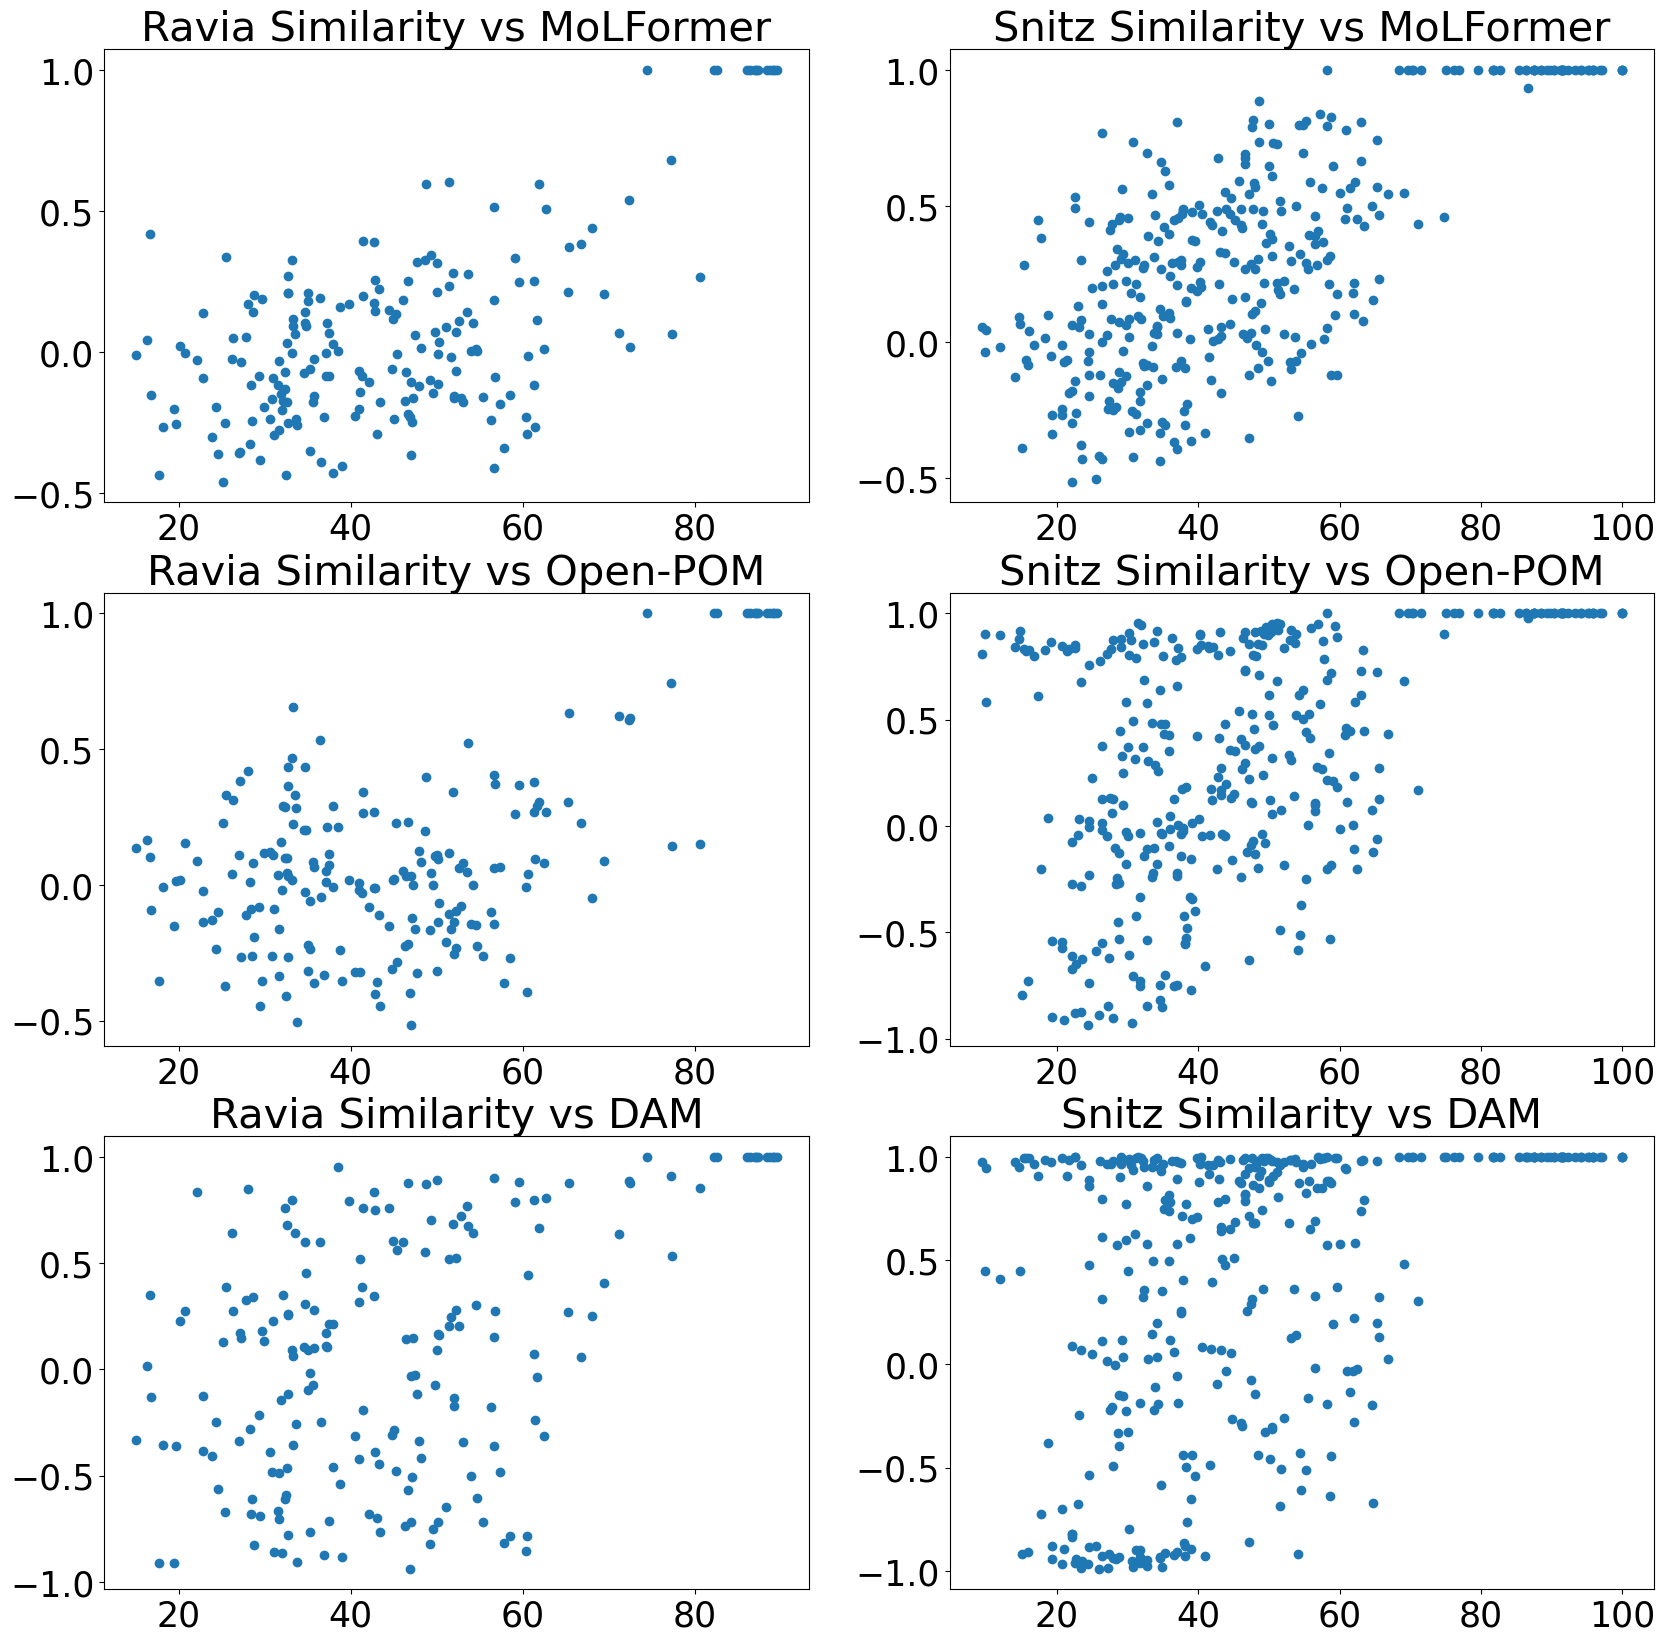

In [62]:
#repeat the same for smiles
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs[0, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_smiles)
axs[0, 0].set_title('Ravia Similarity vs MoLFormer')
axs[0, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_smiles)
axs[0, 1].set_title('Snitz Similarity vs MoLFormer')
axs[1, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum)
axs[1, 0].set_title('Ravia Similarity vs Open-POM')
axs[1, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum)
axs[1, 1].set_title('Snitz Similarity vs Open-POM')
axs[2, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum)
axs[2, 0].set_title('Ravia Similarity vs DAM')
axs[2, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum)
axs[2, 1].set_title('Snitz Similarity vs DAM')
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


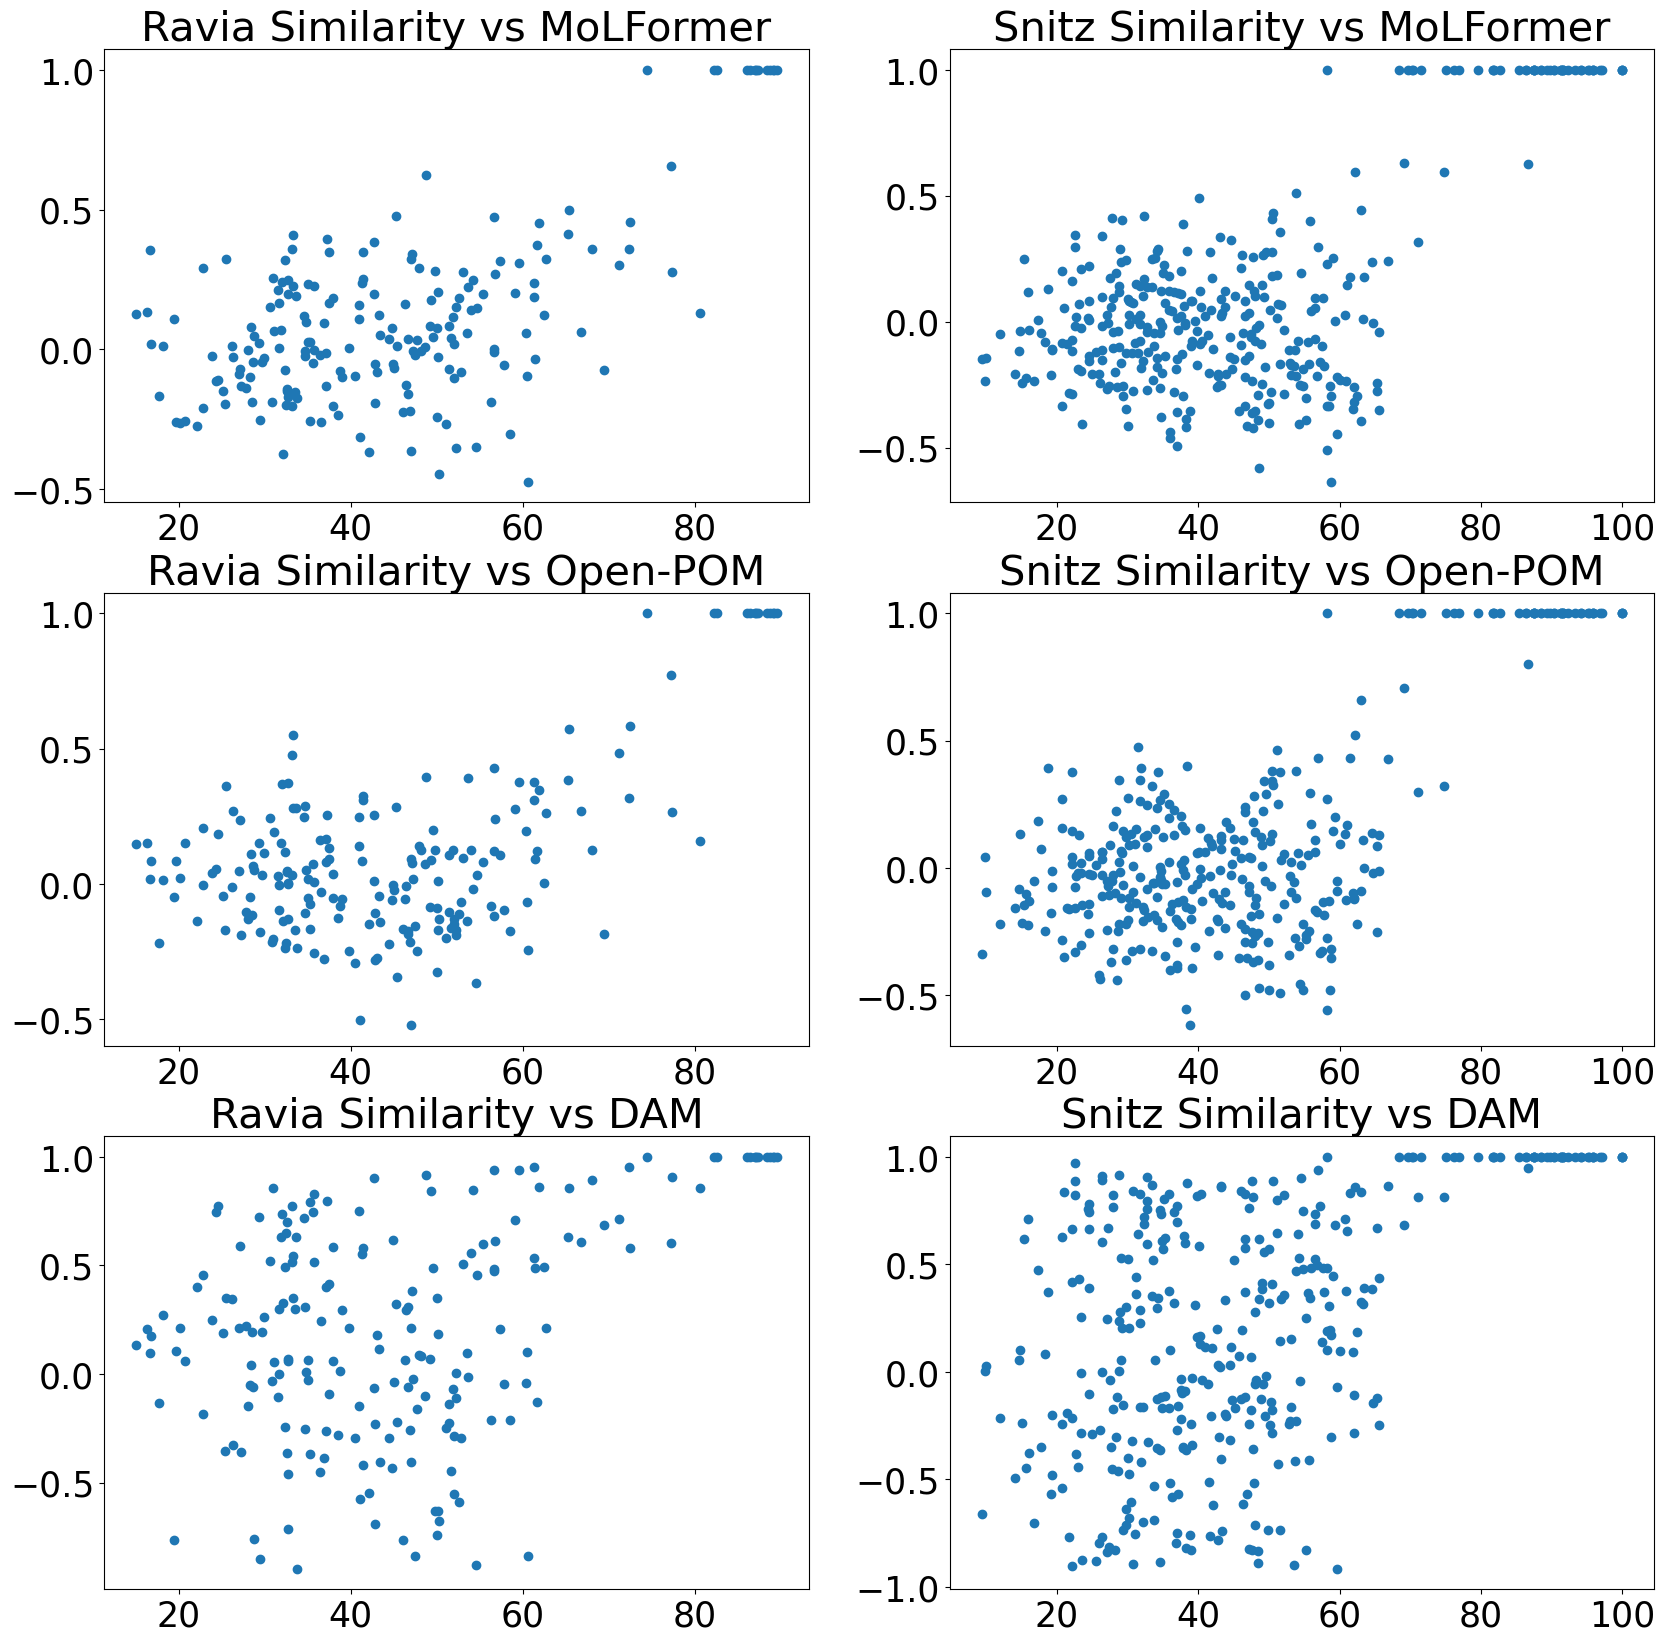

In [63]:
#repeat the same for average
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs[0, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_average)
axs[0, 0].set_title('Ravia Similarity vs MoLFormer')
axs[0, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_average)
axs[0, 1].set_title('Snitz Similarity vs MoLFormer')
axs[1, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_average)
axs[1, 0].set_title('Ravia Similarity vs Open-POM')
axs[1, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_average)
axs[1, 1].set_title('Snitz Similarity vs Open-POM')
axs[2, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_average)
axs[2, 0].set_title('Ravia Similarity vs DAM')
axs[2, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_average)
axs[2, 1].set_title('Snitz Similarity vs DAM')
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


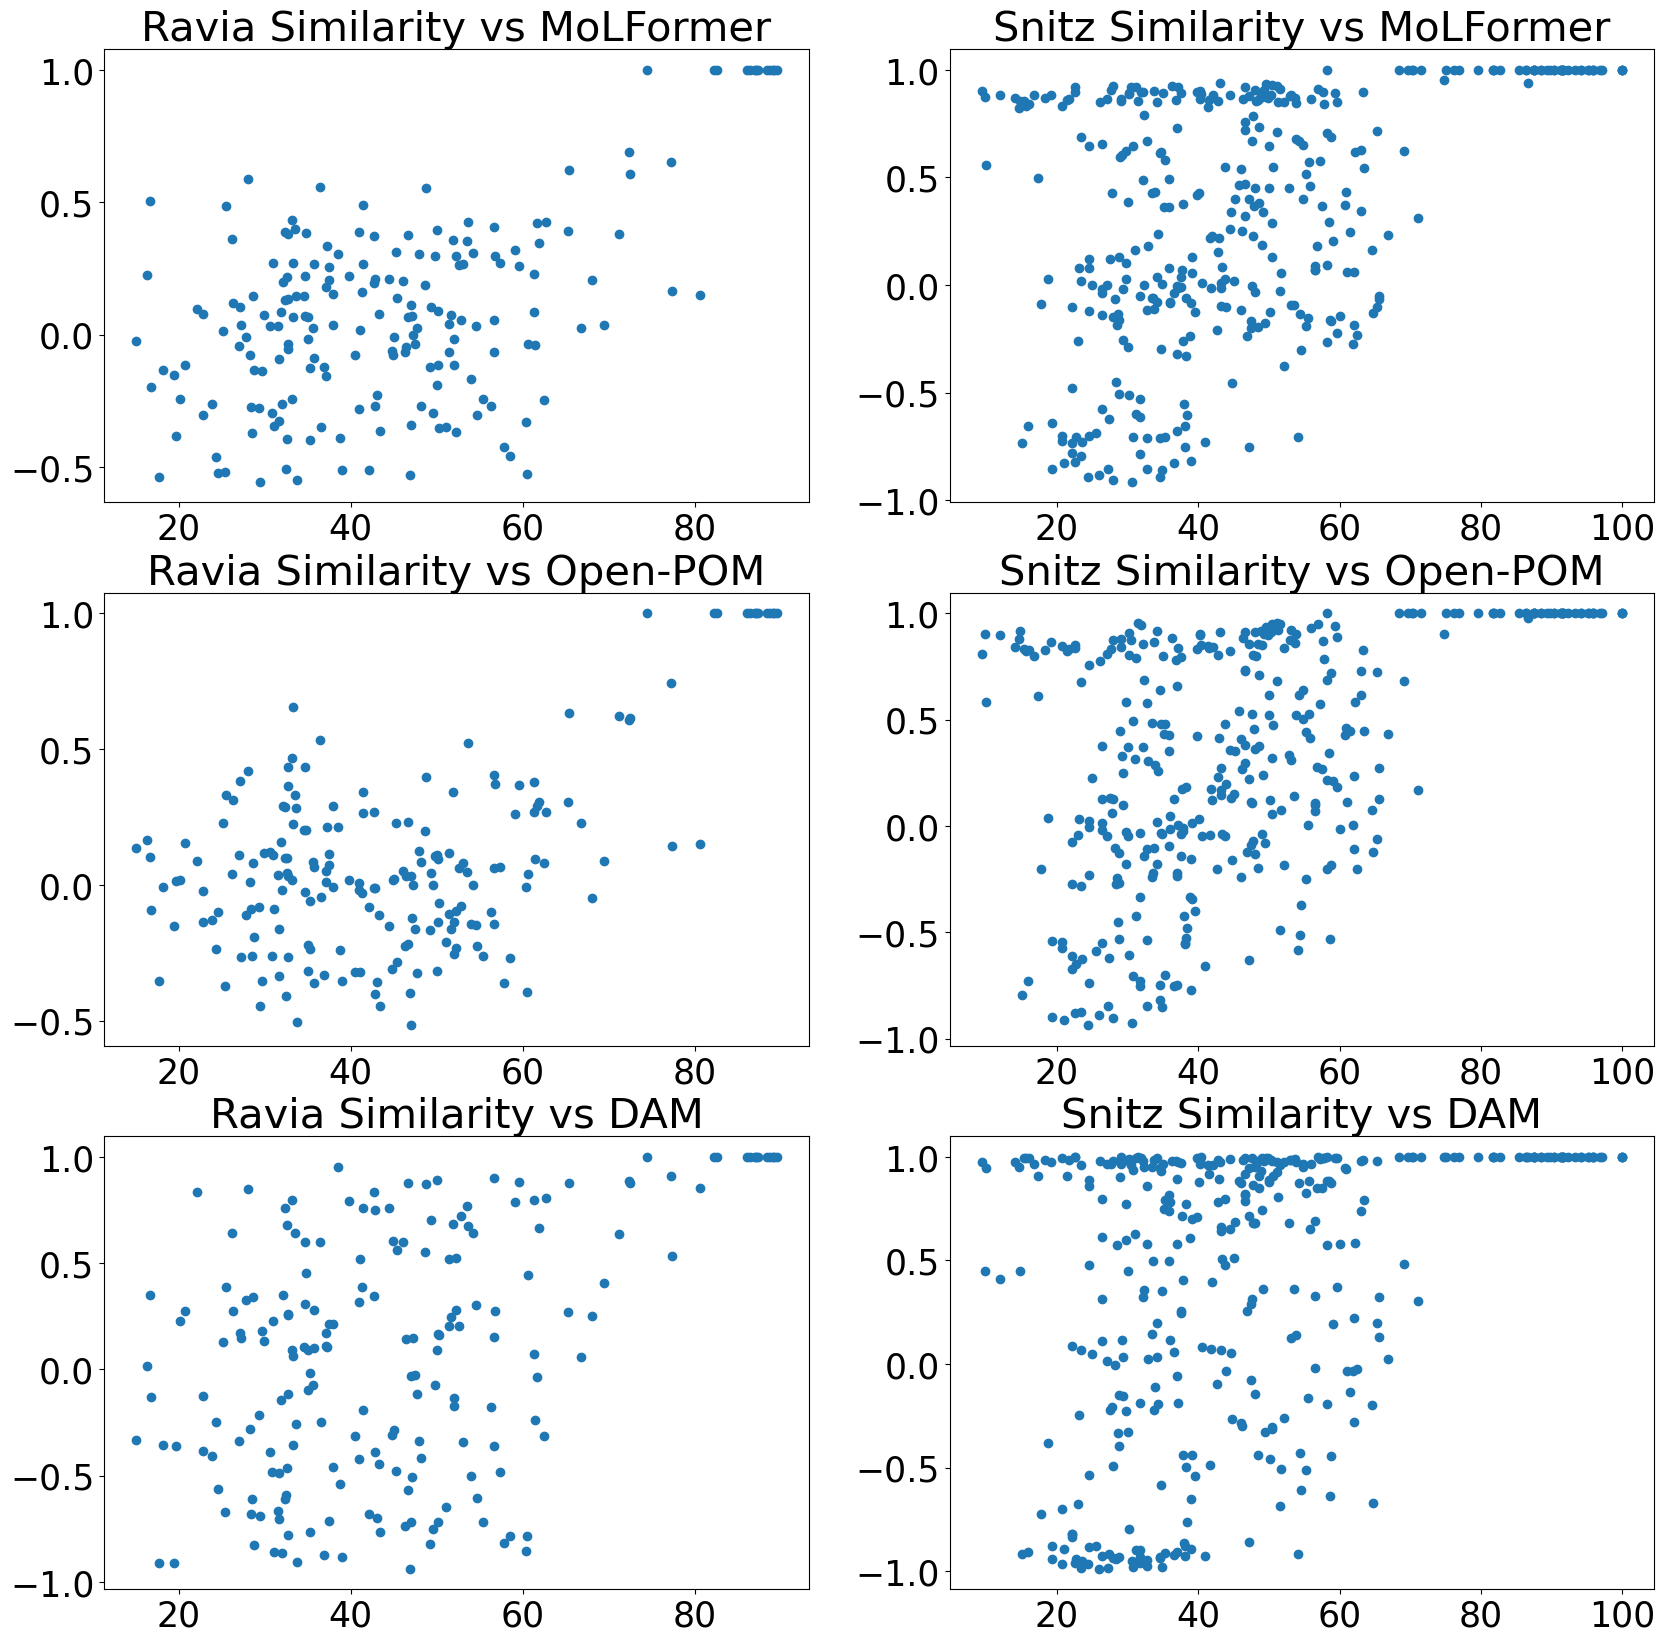

In [64]:
# #scattorplot between the inputs of correlation_helper_mixture
import matplotlib.pyplot as plt
#a 3*2 plot for the 6 scatter plots on ravia and snitz datasets and three molformer, pom and DAM models
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
#plotting the scatter plots
axs[0, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_reps_sum)
axs[0, 0].set_title('Ravia Similarity vs MoLFormer')
axs[0, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_molformer_sum)
axs[0, 1].set_title('Snitz Similarity vs MoLFormer')
axs[1, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_similarity_mols_embeddings_zscored_pom_sum)
axs[1, 0].set_title('Ravia Similarity vs Open-POM')
axs[1, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_pom_sum)
axs[1, 1].set_title('Snitz Similarity vs Open-POM')
axs[2, 0].scatter(df_ravia_similarity_mean_pivoted,cosine_sim_df_ravia_mols_embeddings_zscored_DAM_sum)
axs[2, 0].set_title('Ravia Similarity vs DAM')
axs[2, 1].scatter(df_snitz_mean_pivoted,cosine_sim_df_snitz_mols_embeddings_zscored_DAM_sum)
axs[2, 1].set_title('Snitz Similarity vs DAM')
plt.show()





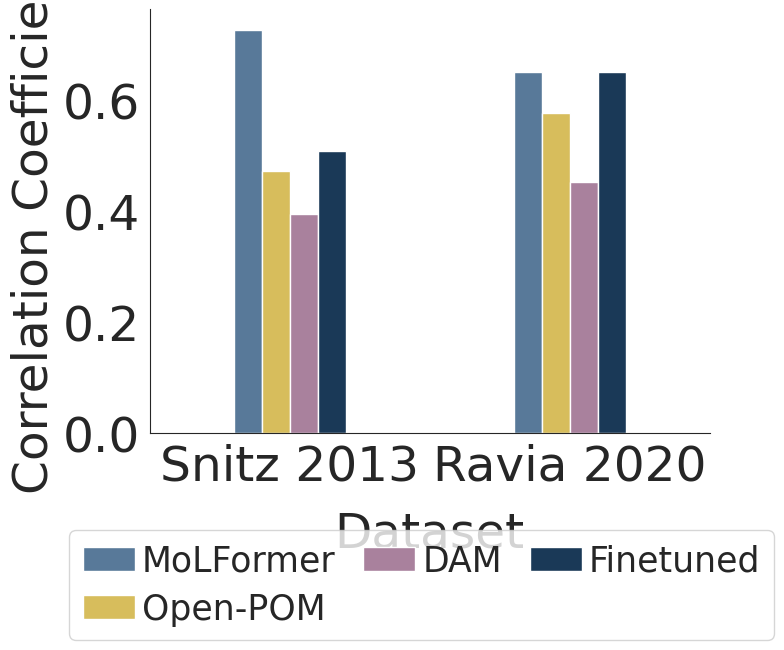

In [65]:
plt.rcParams["font.size"] = 35
data={
    'row_1':  [ "Snitz 2013","MoLFormer",corr_last_snitz_smiles],'row_2':["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity_smiles],
    'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom_sum], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom_sum],
    'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam_sum], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam_sum],
    'row_7':["Ravia 2020","Finetuned" ,corr_last_ravia_finetuned_similarity_sum], 'row_8':["Snitz 2013","Finetuned" ,corr_last_snitz_finetuned_sum],
     }
plot_bars(data,"perception","figs/realign_correlations.pdf")
filename="figs/realign_correlations.pdf"

/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024/utils/visualization_helper.py:166: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  g = sns.barplot(df_corrs, x="Dataset", y="Correlation", hue="type", width=0.4, palette=palette)


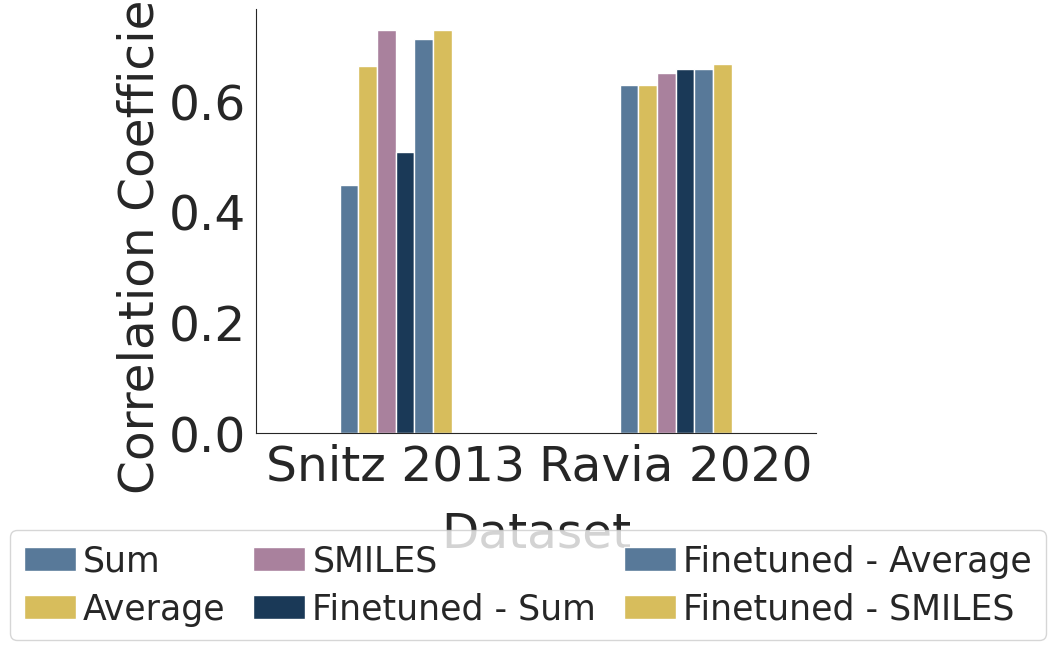

In [66]:
plt.rcParams["font.size"] = 35
data={
    'row_1':  [ "Snitz 2013","Sum",corr_last_snitz_sum],'row_2':["Ravia 2020","Sum" ,corr_last_ravia_similarity_average],
    'row_3':["Ravia 2020","Average" ,corr_last_ravia_similarity_average], 'row_4':["Snitz 2013","Average" ,corr_last_snitz_average],
    'row_5':["Ravia 2020","SMILES" ,corr_last_ravia_similarity_smiles], 'row_6':["Snitz 2013","SMILES" ,corr_last_snitz_smiles],
    
    'row_7':  [ "Snitz 2013","Finetuned - Sum",corr_last_snitz_finetuned_sum],'row_8':["Ravia 2020","Finetuned - Sum" ,corr_last_ravia_finetuned_similarity_average],
    'row_9':["Ravia 2020","Finetuned - Average" ,corr_last_ravia_finetuned_similarity_average], 'row_10':["Snitz 2013","Finetuned - Average" ,corr_last_snitz_finetuned_average],
    'row_11':["Ravia 2020","Finetuned - SMILES" ,corr_last_ravia_finetuned_similarity_smiles], 'row_12':["Snitz 2013","Finetuned - SMILES" ,corr_last_snitz_finetuned_smiles],
     }
plot_bars(data,"perception","figs/realign_correlations_mixture_comparison.pdf")
# filename="figs/realign_correlations_mixture_comparison.pdf"

In [67]:
# plt.rcParams["font.size"] = 35
# data={
#     'row_1':  [ "Snitz 2013","MoLFormer",corr_last_snitz_smiles],'row_2':["Ravia 2020","MoLFormer" ,corr_last_ravia_similarity_smiles],
#     'row_3':["Ravia 2020","Open-POM" ,corr_last_ravia_similarity_pom], 'row_4':["Snitz 2013","Open-POM" ,corr_last_snitz_pom],
#     'row_5':["Ravia 2020","DAM" ,corr_last_ravia_similarity_dam], 'row_6':["Snitz 2013","DAM" ,corr_last_snitz_dam],
#     
#     # , "row_3": ["Keller 2016","Raw Representations",corr_last_keller],
#     # 'row_4':  [ "Snitz 2013","Transformed Representations",corr_last_linear_snitz],'row_5':["Ravia 2020 ","Transformed Representations" ,corr_last_linear_ravia_similarity] ,'row_3':["Ravia 2020 ","Raw Representations" ,corr_last_ravia_similarity_pom
#     
#     # , "row_6": ["Keller 2016","Transformed Representations",corr_last_linear_keller]
# 
#      }
# plot_bars(data,"perception","figs/realign_correlations.pdf")
# filename="figs/realign_correlations.pdf"

NameError: name 'corr_last_snitz_pom' is not defined

In [ ]:
# plt.rcParams["font.size"] = 35   
# data={'row_1':  [ "Snitz",corr_layers_snitz],'row_2':["Ravia" ,corr_layers_ravia_similarity] 
#      # , "row_4": ["Keller 2016",corr_layers_keller]
#      }
# plot_lines(data,"perception","figs/realign_layers.pdf")

In [68]:
# df_gslf_mols_layers# fig, axes = plt.subplots(1, 4, sharex=True, figsize=(16,8))
df_gslf_mols, _,_,_,df_gslf_mols_embeddings_zscored,_,_=prepare_goodscentleffignwell_mols(modeldeepchem_gslf,lm,tokenizer)


# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.3, 0.28)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.6, 1)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (1, 0.35)
plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_mols_embeddings_zscored['Combined'].values.tolist()),np.asarray(df_gslf_mols.y.values.tolist()), "/kaggle/working/", gs_lf_tasks,"2",size1,size2,size3)
# pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), "/kaggle/working/", TASKS,"1",size1,size2,size3)


<Figure size 1000x1000 with 0 Axes>

In [69]:
input_embeddings='/local_storage/datasets/farzaneh/alignment_olfaction_datasets/curated_datasets/embeddings/pom/gslf_pom_embeddings_Apr17.csv'
df_gslf_pom = pd.read_csv(input_embeddings, converters={'embeddings': pd.eval , "y": pd.eval})

# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.3,0.86)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.9, .7)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (0.3, 0.2)



# type1 = {'floral': '#F3F1F7', 'subs': {'muguet': '#FAD7E6', 'lavender': '#8883BE', 'jasmin': '#BD81B7'}}
size1 = (0.8, 0.4)

# type2 = {'meaty': '#F5EBE8', 'subs': {'savory': '#FBB360', 'beefy': '#7B382A', 'roasted': '#F7A69E'}}
size2 = (0.9, 1.01)

# type3 = {'ethereal': '#F2F6EC', 'subs': {'cognac': '#BCE2D2', 'fermented': '#79944F', 'alcoholic': '#C2DA8F'}}
size3 = (0.4, 1.02)



plt.rcParams["font.size"] = 35
pom_frame(np.asarray(df_gslf_pom['embeddings'].values.tolist()),np.asarray(df_gslf_pom.y.values.tolist()), "/kaggle/working/", gs_lf_tasks,"1",size1,size2,size3)


<Figure size 1000x1000 with 0 Axes>